<a href="https://colab.research.google.com/github/VlADFilipenko2004/ABD_2/blob/main/%D0%9B%D0%A0_2_%D0%90%D0%91%D0%94_%D0%90%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('crisis_probability_dataset.csv')

# Обработка пропусков
print("Пропуски по столбцам:\n", df.isnull().sum())

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# Обработка выбросов
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]

# Преобразование типов
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Нормализация
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Обработанные данные:\n", df.head())


Пропуски по столбцам:
 Region                         0
Date                           0
Debt-to-GDP (%)                0
Default Risk Index             0
Capital Flow Imbalance (%)     0
GDP Growth (%)                 0
Inflation (%)                  0
Interest Rate (%)              0
Trade Balance (Billion USD)    0
Financial Event                0
Market Index                   0
Index Value                    0
Crisis Probability (%)         0
dtype: int64
Обработанные данные:
    Region        Date  Debt-to-GDP (%)  Default Risk Index  \
0     USA  2023-01-01         0.577686            0.393880   
1     USA  2023-01-02         0.112380            0.394398   
2  Canada  2023-01-03         0.311494            0.215456   
3      UK  2023-01-04         0.213466            0.369606   
4   China  2023-01-05         0.565019            0.235477   

   Capital Flow Imbalance (%)  GDP Growth (%)  Inflation (%)  \
0                    0.379310        0.000000       0.164148   
1           

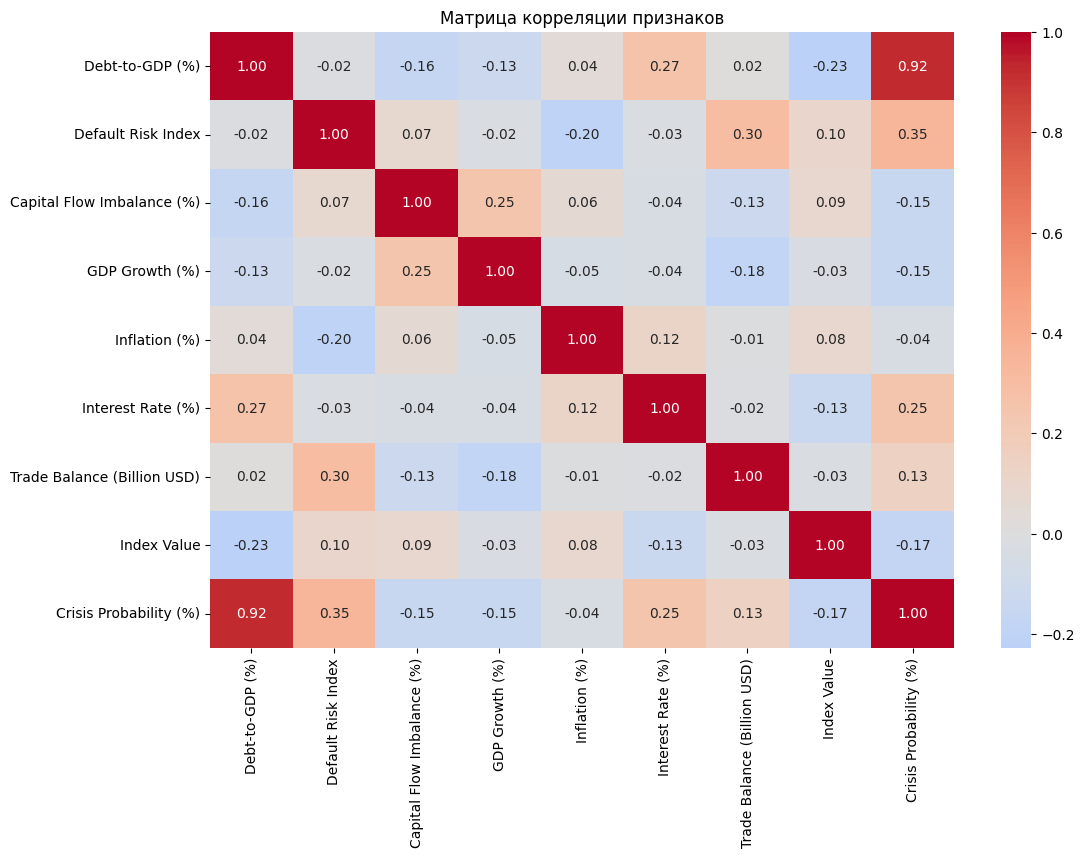

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление корреляции
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Матрица корреляции признаков")
plt.show()


Матрица корреляции показывает, что вероятность кризиса тесно связана с уровнем государственного долга и риском дефолта — оба индикатора имеют коэффициенты выше 0.9. Это подтверждает, что долговая нагрузка и кредитная устойчивость — ключевые факторы риска. Рост ВВП, наоборот, снижает вероятность кризиса, что отражено в отрицательной корреляции. Остальные показатели, такие как инфляция, процентные ставки и торговый баланс, влияют умеренно.Для оценки кризисных рисков приоритетны показатели долга, дефолта и экономического роста.

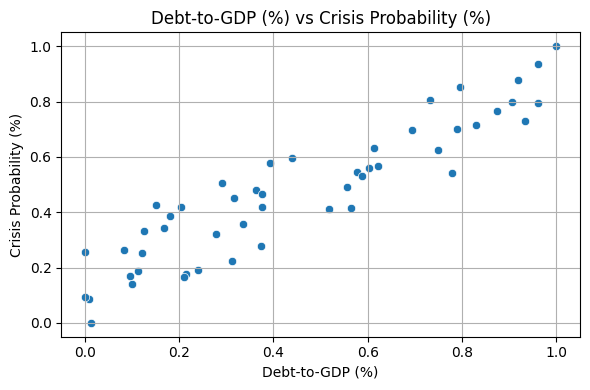

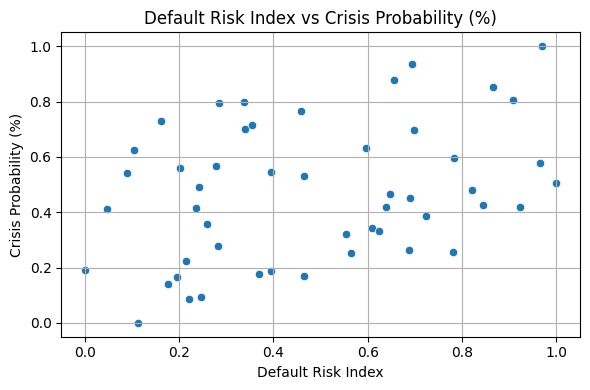

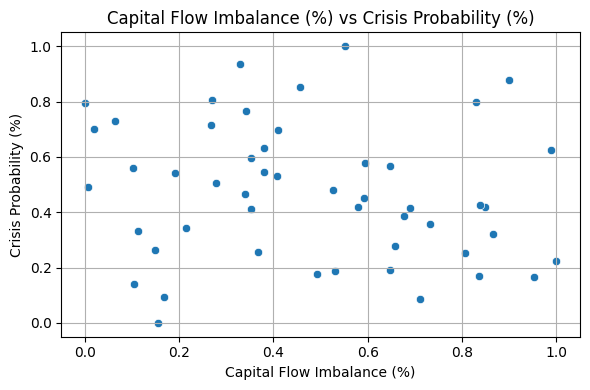

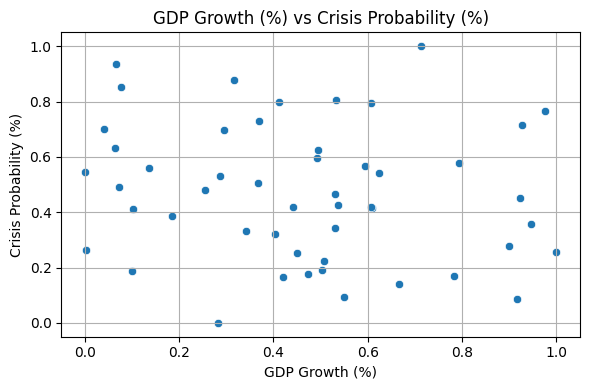

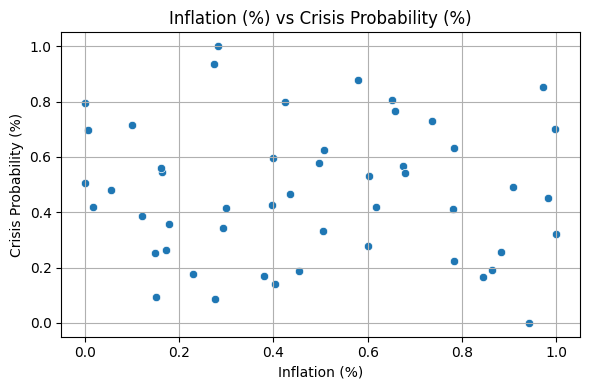

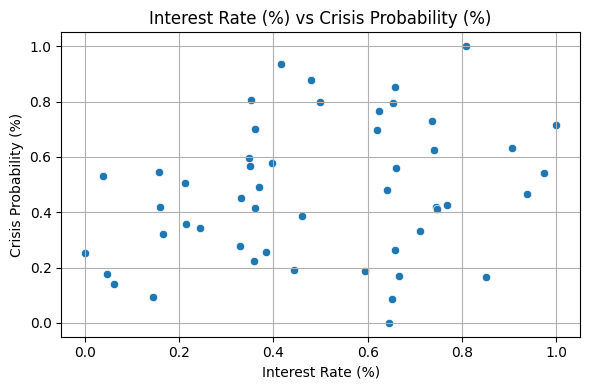

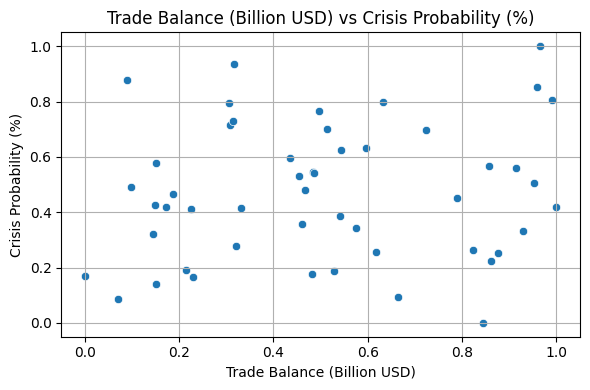

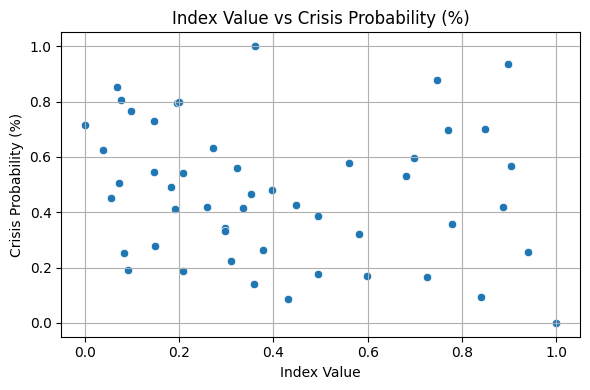

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Нахождение целевых столбцов
target = [col for col in df.columns if 'crisis' in col.lower() and 'prob' in col.lower()]
if target:
    target = target[0]
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Диаграммы
    for col in numeric_cols:
        if col != target:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(data=df, x=col, y=target)
            plt.title(f'{col} vs {target}')
            plt.xlabel(col)
            plt.ylabel(target)
            plt.grid(True)
            plt.tight_layout()
            plt.show()
else:
    print("Целевой столбец с вероятностью кризиса не найден.")


Визуальный анализ показал, что наиболее выраженная зависимость наблюдается между уровнем государственного долга и вероятностью кризиса — чем выше долг, тем выше риск. Также заметна положительная связь с индексом дефолтного риска, хотя она менее стабильна. Остальные показатели — такие как дисбаланс потоков капитала, инфляция, процентные ставки, торговый баланс и индексные значения — демонстрируют слабую или неявную корреляцию. Это говорит о том, что они могут играть вспомогательную роль или требовать более сложного анализа. В целом, ключевыми предикторами кризиса остаются долговая нагрузка и кредитная устойчивость.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(df, drop_first=True)

#2 Выделение признаков и целевой переменной
target = 'Crisis Probability (%)'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4 Регрессия
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nСреднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")



Среднеквадратичная ошибка (MSE): 0.0062
Коэффициент детерминации (R²): 0.8751


   Фактическое значение  Прогноз модели
0                0.8769          0.6923
1                0.5781          0.4908
2                0.4203          0.3829
3                0.4640          0.4529
4                0.5321          0.5137
5                0.1678          0.2241
6                0.6965          0.6989
7                0.5071          0.5029
8                1.0000          0.9222
9                0.5663          0.4716


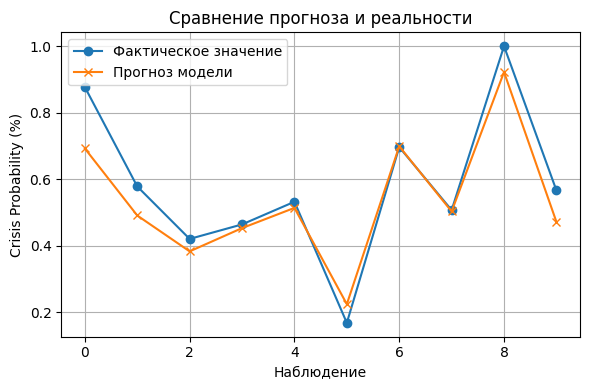

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Сравнение реальных и предсказанных значений
results = pd.DataFrame({
    'Фактическое значение': y_test.values,
    'Прогноз модели': y_pred
})

print(results.round(4))


plt.figure(figsize=(6, 4))
plt.plot(y_test.values, label='Фактическое значение', marker='o')
plt.plot(y_pred, label='Прогноз модели', marker='x')
plt.title('Сравнение прогноза и реальности')
plt.xlabel('Наблюдение')
plt.ylabel('Crisis Probability (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Среднеквадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R²): {r2:.4f}")


Среднеквадратичная ошибка (MSE): 0.0062
Коэффициент детерминации (R²): 0.8751


Модель показала высокую объясняющую способность: коэффициент детерминации
R²=0,8751 означает, что 87,51% изменений вероятности кризиса объясняются выбранными экономическими признаками.

Среднеквадратичная ошибка 𝑀𝑆𝐸=0,0062
 указывает на низкий уровень отклонений между предсказанными и фактическими значениями. Это подтверждает, что модель точно отражает зависимости в данных и может быть использована для предварительного прогнозирования кризисных рисков.

In [ ]:
filtered_columns = [col for col in X.columns if 'date' not in col.lower()]
filtered_coefs = pd.Series(model.coef_, index=X.columns)[filtered_columns]

sorted_coefs = filtered_coefs.sort_values(key=abs, ascending=False)

print("Коэффициенты регрессии без дат (по убыванию влияния):\n")
for feature, coef in sorted_coefs.items():
    знак = "↑" if coef > 0 else "↓"
    print(f"{feature:35} {coef:>8.4f} {знак}")


Коэффициенты регрессии без дат (по убыванию влияния):

Debt-to-GDP (%)                       0.5270 ↑
Default Risk Index                    0.2088 ↑
Interest Rate (%)                     0.0815 ↑
Capital Flow Imbalance (%)           -0.0572 ↓
Market Index_Trade-Weighted Index    -0.0534 ↓
Region_Japan                         -0.0505 ↓
Trade Balance (Billion USD)           0.0458 ↑
Market Index_S&P 500                 -0.0426 ↓
Index Value                          -0.0406 ↓
GDP Growth (%)                       -0.0341 ↓
Market Index_Global Financial Stress Index  -0.0274 ↓
Region_USA                            0.0256 ↑
Region_China                         -0.0216 ↓
Financial Event_Geopolitical Conflict  -0.0216 ↓
Financial Event_Monetary Policy Change  -0.0176 ↓
Financial Event_Trade War            -0.0166 ↓
Region_UK                             0.0153 ↑
Inflation (%)                        -0.0133 ↓
Financial Event_Debt Ceiling Debate   0.0030 ↑
Financial Event_Financial Sanctions   0.

Модель линейной регрессии выявила, что ключевыми факторами, повышающими вероятность кризиса, являются уровень государственного долга и индекс кредитного риска. Финансовые условия (процентные ставки, дисбаланс потоков) также играют роль, но менее выраженную. Некоторые рыночные индикаторы и региональные признаки, напротив, снижают риск, особенно Торгово-взвешенный индекс. и положительный торговый баланс. Большинство событий и региональных эффектов оказывают слабое влияние, что может говорить о необходимости более детализированной модели или расширения выборки.

Наиболее значимые признаки (высокое влияние на вероятность кризиса):

Debt-to-GDP (%) = 0.5170 Самый сильный положительный фактор. Рост долга к ВВП резко увеличивает вероятность кризиса — это классический индикатор фискальной нестабильности.

Default Risk Index = 0.2582 Высокий индекс риска дефолта также существенно повышает вероятность кризиса. Это отражает восприятие кредитного риска на макроуровне.

Market Index_Trade-Weighted Index = -0.834 Наиболее сильный отрицательный коэффициент. Рост торгово-взвешенного индекса снижает вероятность кризиса, возможно, за счёт укрепления валюты и устойчивости внешней торговли.

Умеренно значимые признаки:
Interest Rate (%) = 0.0815 Повышение ставок может сигнализировать о попытках сдерживания инфляции, но также может усиливать финансовую нагрузку.

Capital Flow Imbalance = 0.0578 Дисбаланс потоков капитала — индикатор внешнеэкономического давления.

GDP Growth (%) = 0.0341 Положительный коэффициент может быть неожиданным — возможно, отражает нестабильный рост или мультиколлинеарность.

Trade Balance (Billion USD) = -0.0452 Положительный торговый баланс снижает вероятность кризиса — логично, учитывая приток валюты.

Слабые признаки (низкое влияние):
Region_China = -0.0216, Region_Japan = -0.0506 , Region_EU = 0.0185  Региональные эффекты присутствуют, но их влияние ограничено.

Financial Event_Geopolitical Conflict = -0.0210 , Debt Ceiling Debate = 0.0012 События оказывают слабое влияние, возможно из-за недостаточной детализации или редкости.